# Raichle1983Model for Image-Derived Input Functions, single TAC

## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os

# basic numeric setup
import numpy as np

from Raichle1983Model import Raichle1983Model

In [2]:
singularity = "/Volumes/PrecunealSSD/Singularity"
niis = [
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421144815", "pet", 
    "sub-108293_ses-20210421144815_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421150523", "pet", 
    "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421154248", "pet", 
    "sub-108293_ses-20210421154248_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
   "CCIR_01211", "derivatives", "sub-108293", "ses-20210421155709", "pet", 
   "sub-108293_ses-20210421155709_trc-fdg_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031100910", "pet", 
    "sub-108237_ses-20221031100910_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031102320", "pet", 
    "sub-108237_ses-20221031102320_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031103712", "pet", 
    "sub-108237_ses-20221031103712_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031110638", "pet", 
    "sub-108237_ses-20221031110638_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031113804", "pet", 
    "sub-108237_ses-20221031113804_trc-fdg_proc-MipIdif_idif.nii.gz"), 
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116095143", "pet", 
    "sub-108254_ses-20221116095143_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116100858", "pet", 
    "sub-108254_ses-20221116100858_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116102328", "pet", 
    "sub-108254_ses-20221116102328_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116104751", "pet", 
    "sub-108254_ses-20221116104751_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116115244", "pet", 
    "sub-108254_ses-20221116115244_trc-fdg_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207093856", "pet", 
    "sub-108250_ses-20221207093856_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207095507", "pet", 
    "sub-108250_ses-20221207095507_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207100946", "pet", 
    "sub-108250_ses-20221207100946_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207102944", "pet", 
    "sub-108250_ses-20221207102944_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207104909", "pet", 
    "sub-108250_ses-20221207104909_trc-fdg_proc-MipIdif_idif.nii.gz"), 
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220093702", "pet", 
    "sub-108284_ses-20230220093702_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220095210", "pet", 
    "sub-108284_ses-20230220095210_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220101103", "pet", 
    "sub-108284_ses-20230220101103_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220103226", "pet", 
    "sub-108284_ses-20230220103226_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220112328", "pet", 
    "sub-108284_ses-20230220112328_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227103048", "pet", 
    "sub-108306_ses-20230227103048_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227104631", "pet", 
    "sub-108306_ses-20230227104631_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227112148", "pet", 
    "sub-108306_ses-20230227112148_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227113853", "pet", 
    "sub-108306_ses-20230227113853_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227115809", "pet", 
    "sub-108306_ses-20230227115809_trc-fdg_proc-MipIdif_idif.nii.gz")]

In [3]:
# define model
input_function = os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif.nii.gz"),
pet_measurement = os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-BrainMoCo2-createNiftiMovingAvgFrames-ParcWmparc-reshape-to-wmparc-select-all.nii.gz"),
bc = Raichle1983Model(input_function[0], pet_measurement[0], nlive=1000) # 1000

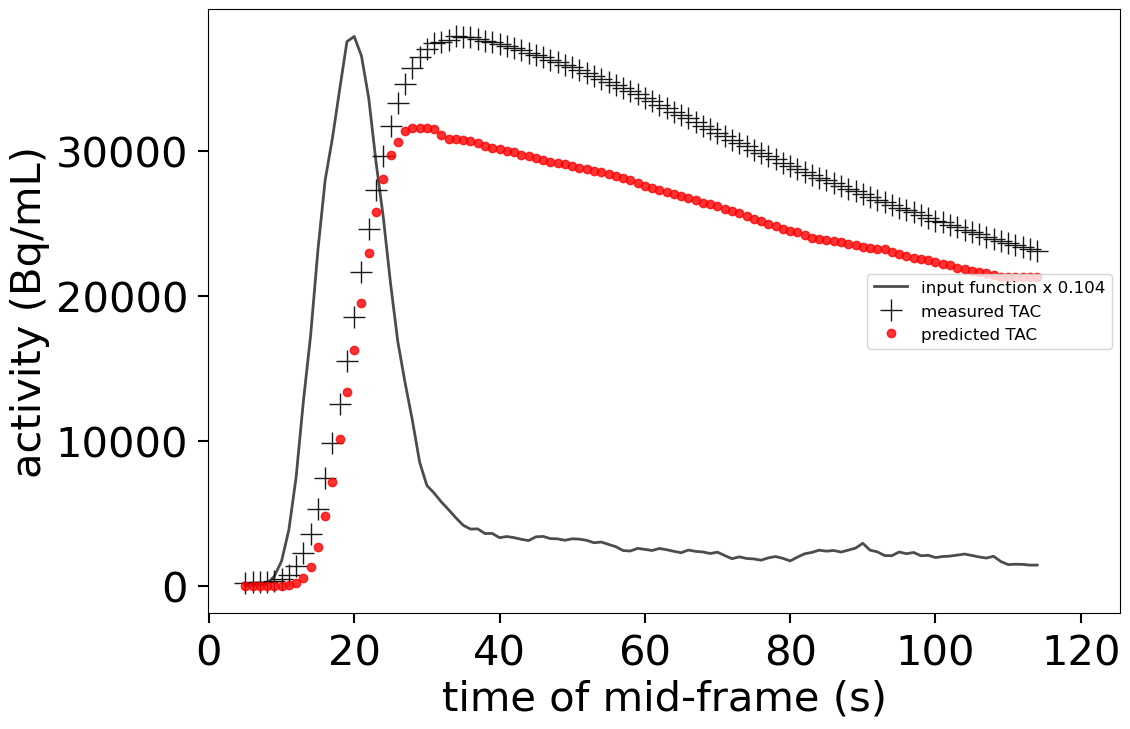

In [5]:
bc.plot_truths()

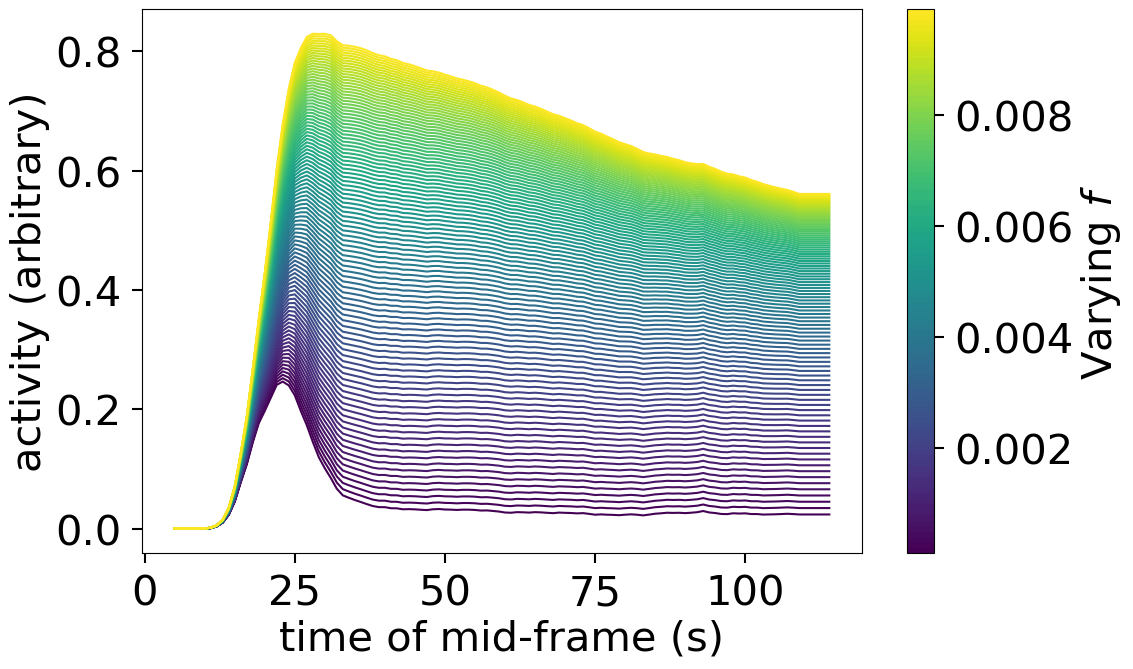

In [6]:
bc.plot_variations(tindex=0, tmin=0.0001, tmax=0.01)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

iter: 3000 | batch: 0 | bound: 0 | nc: 5 | ncall: 19110 | eff(%): 14.918 | loglstar:   -inf < -224.519 <    inf | logz: -233.670 +/-  0.091 | dlogz: 468.659 >  0.010                                 IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

iter: 23506 | batch: 2 | bound: 2 | nc: 1 | ncall: 921181 | eff(%):  2.427 | loglstar: 241.403 < 242.978 < 241.974 | logz: 230.830 +/-  0.095 | stop:  1.118                                          IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerAp

Parameter 0: 0.012 [0.010, 0.017]
Parameter 1: 1.192 [1.150, 1.237]
Parameter 2: 0.020 [0.015, 0.029]
Parameter 3: 8.311 [8.116, 8.502]
Parameter 4: 0.027 [0.023, 0.031]
Parameter 0: 0.012 [0.010, 0.017]
Parameter 1: 1.192 [1.150, 1.237]
Parameter 2: 0.020 [0.015, 0.029]
Parameter 3: 8.311 [8.116, 8.502]
Parameter 4: 0.027 [0.023, 0.031]


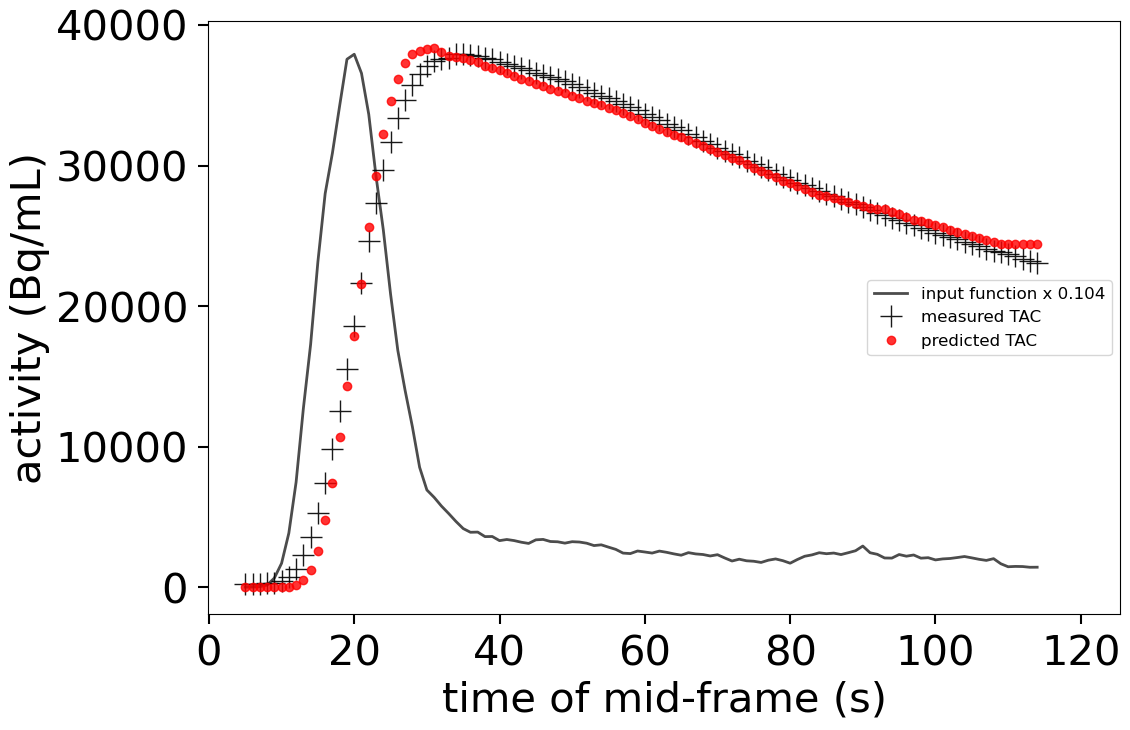

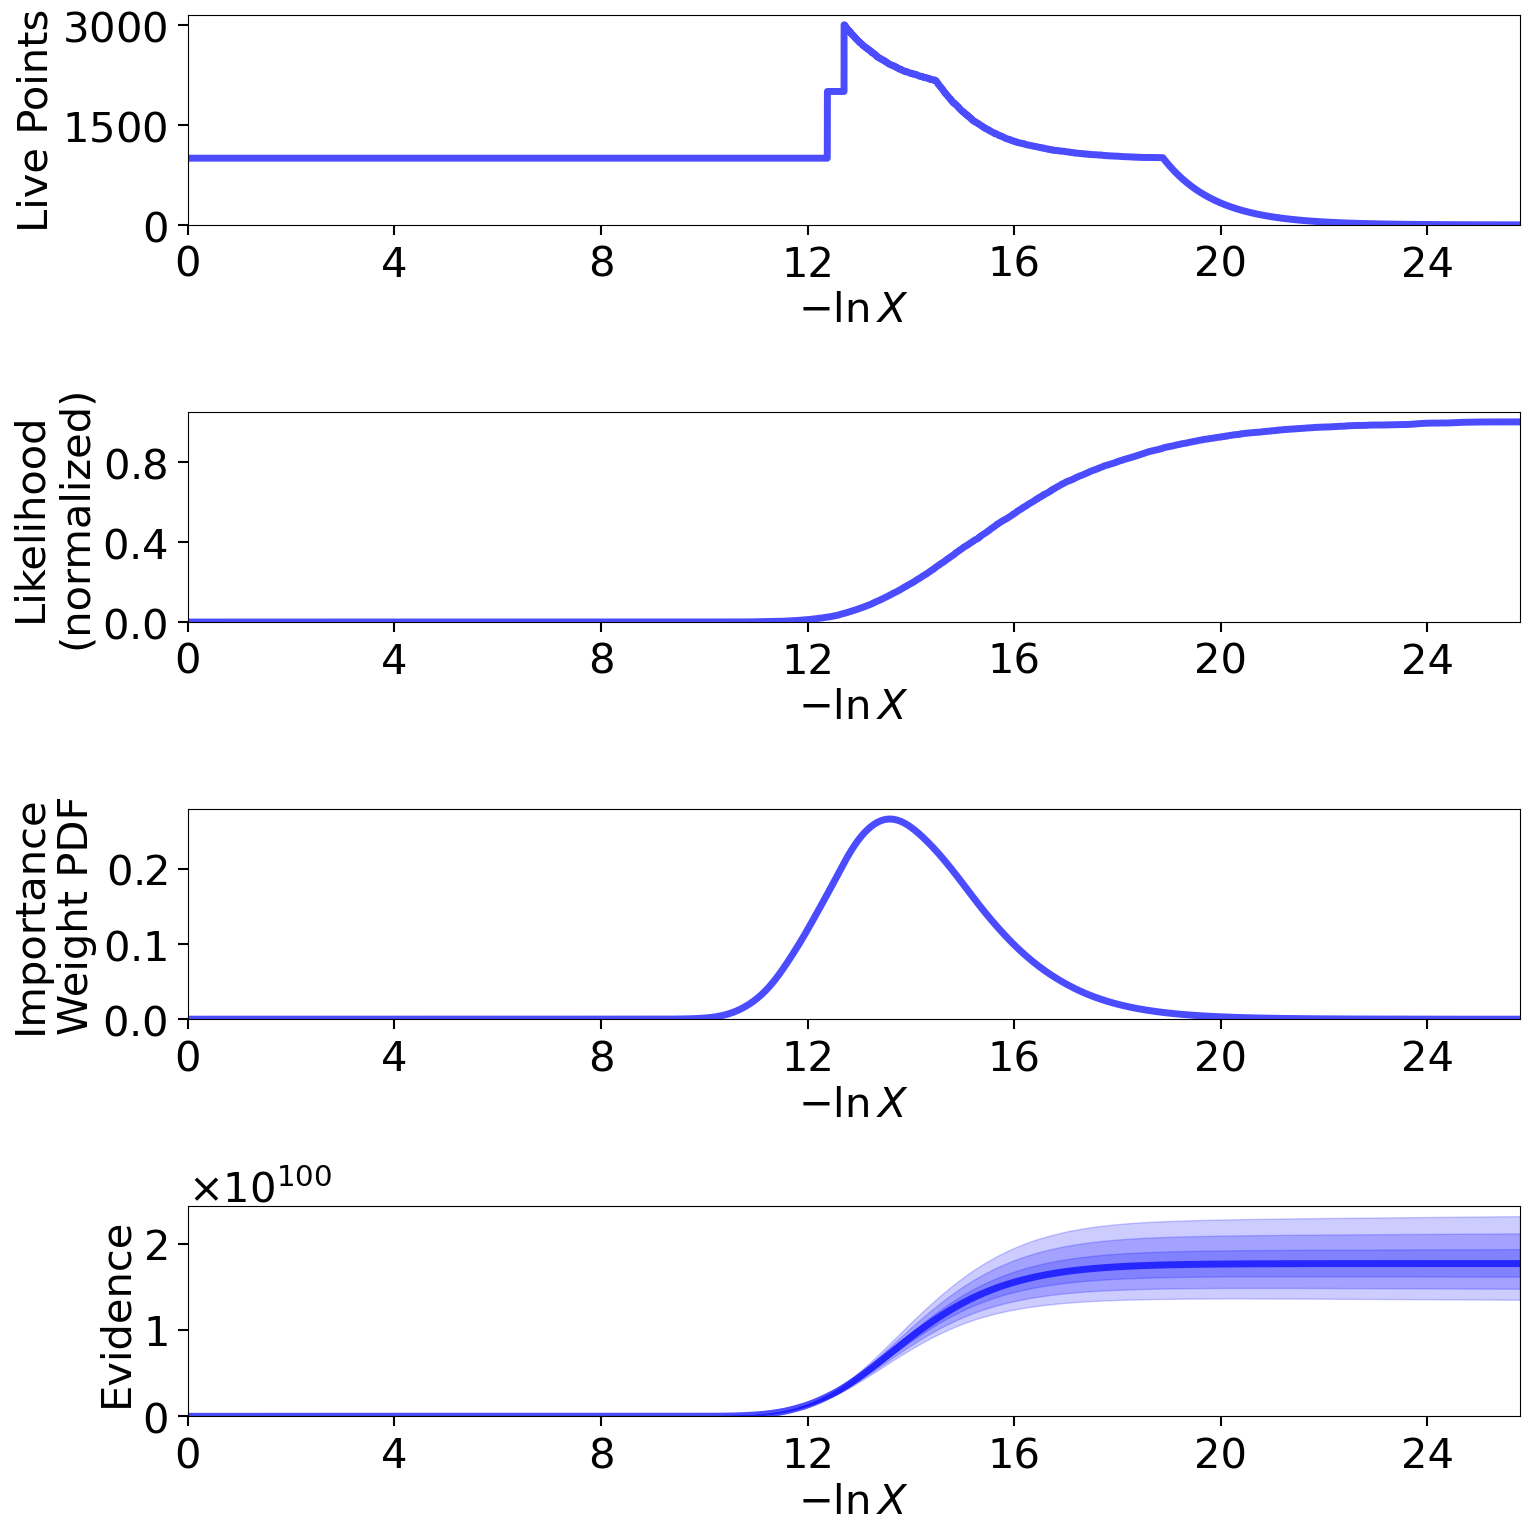

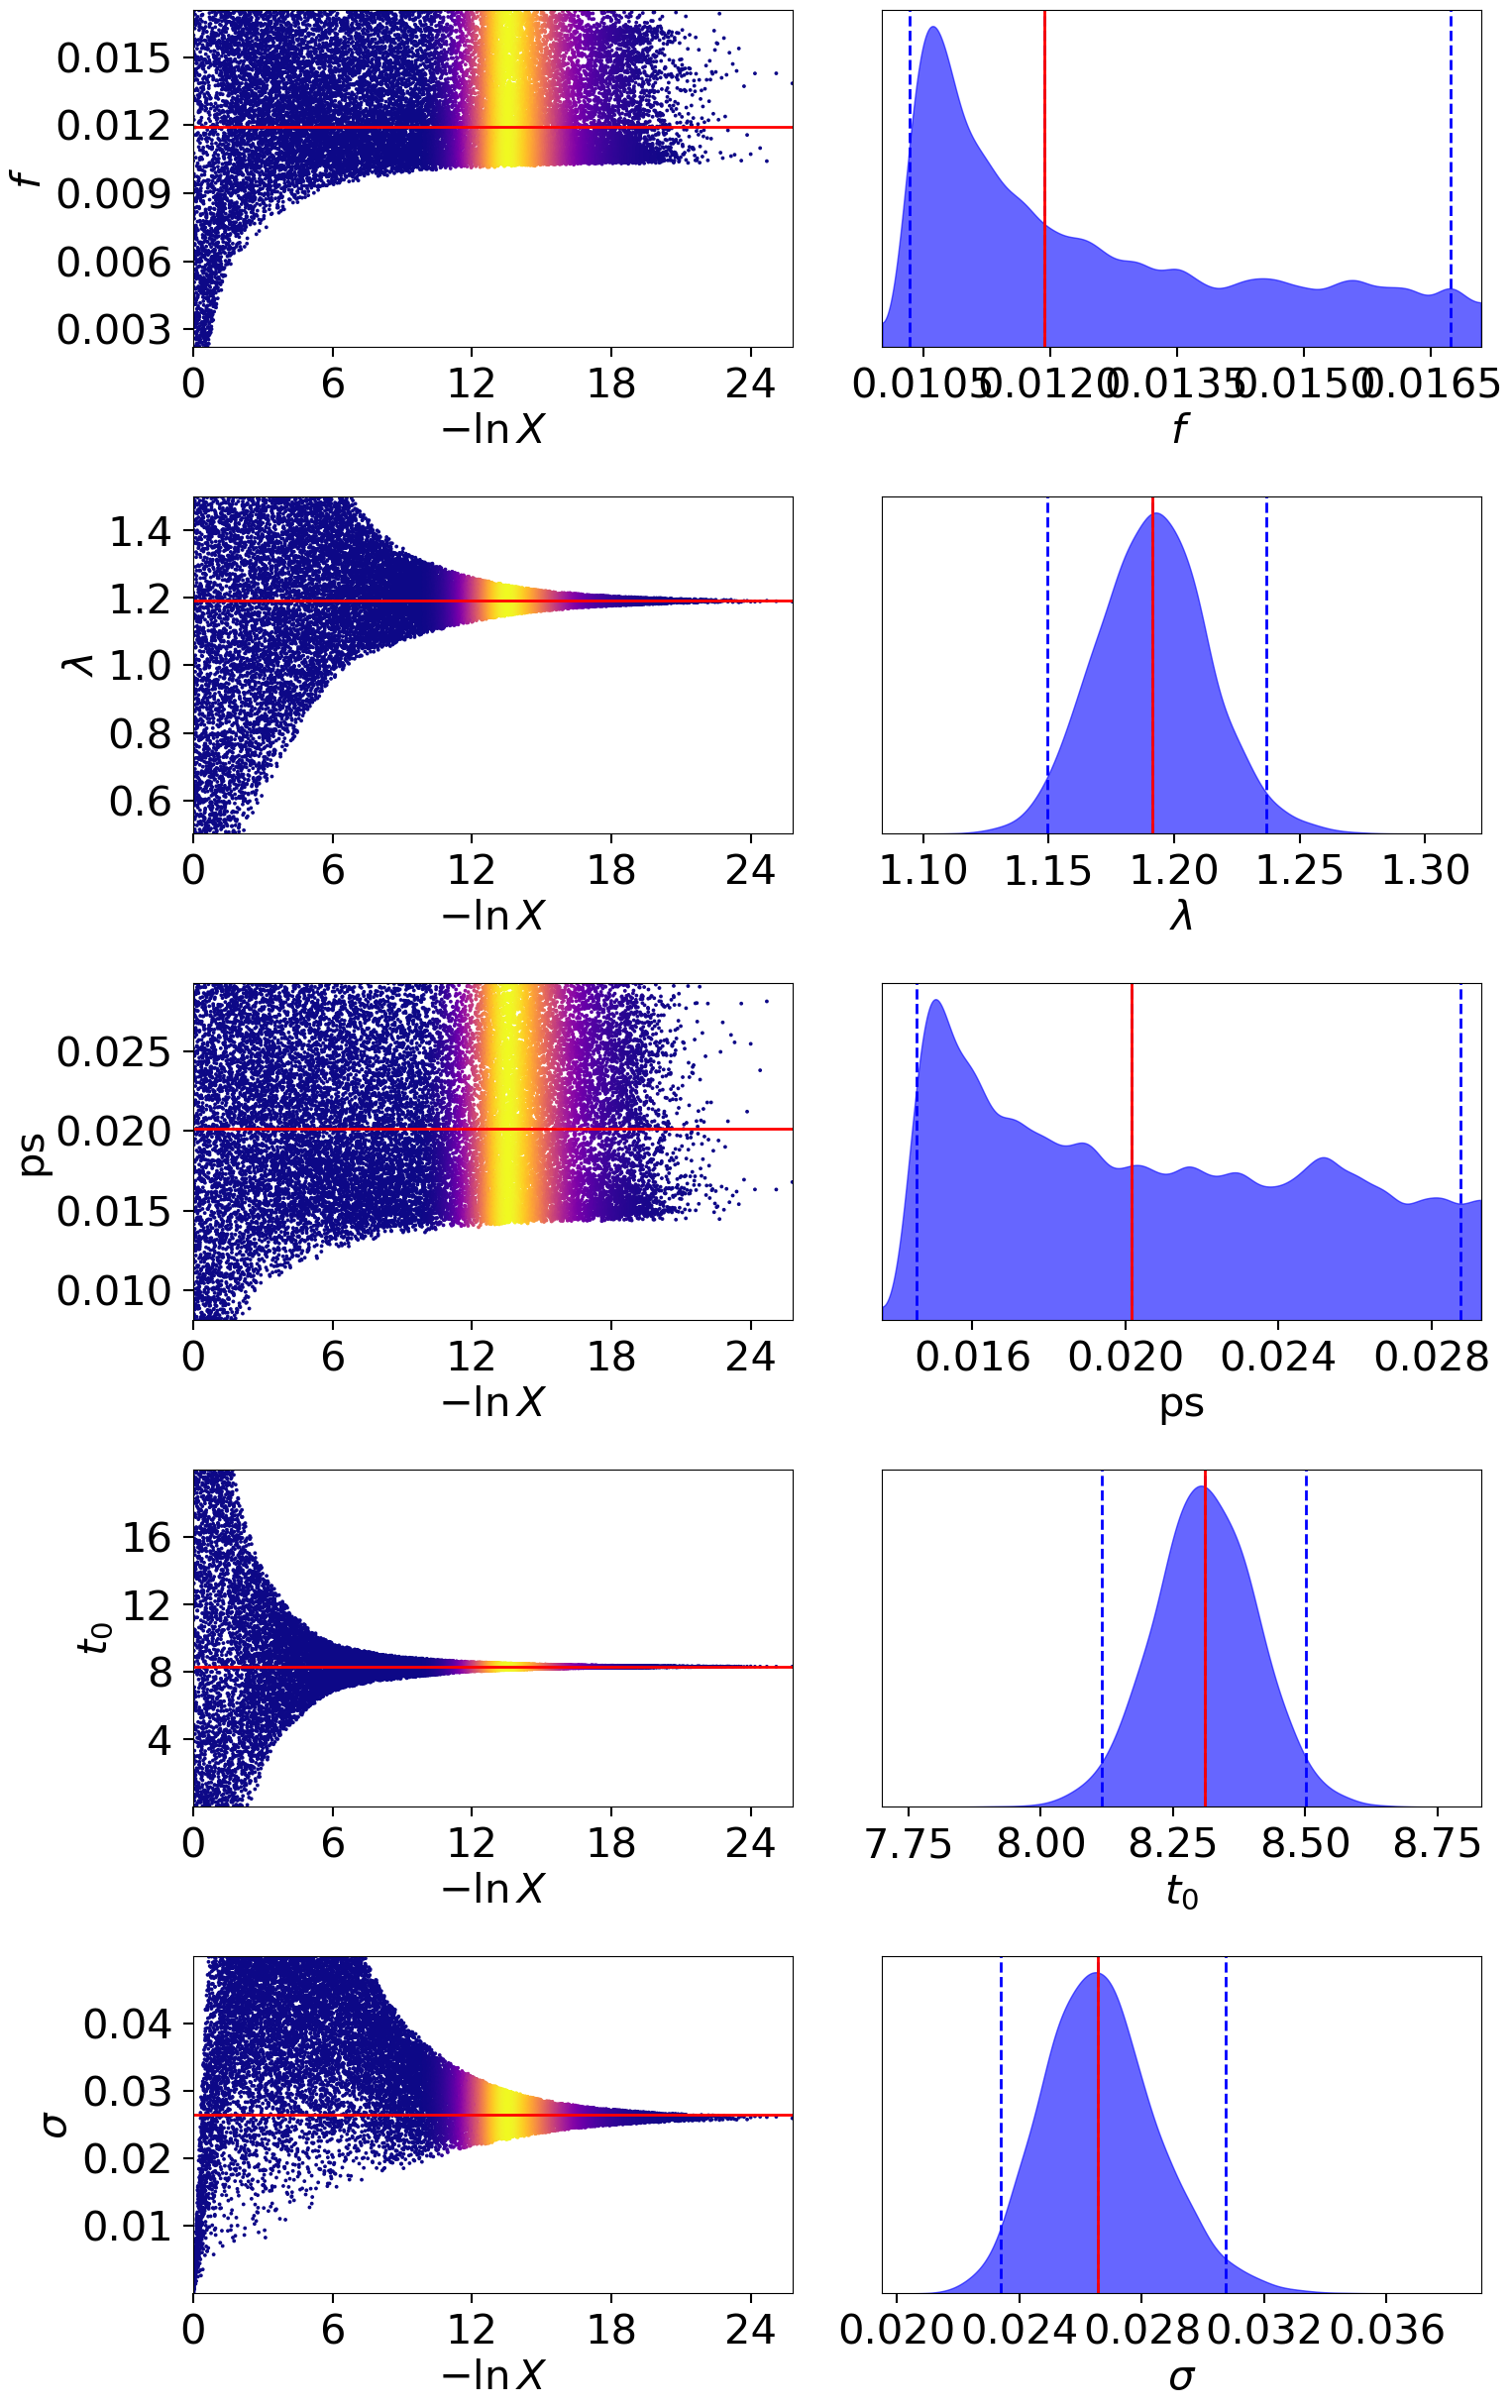

In [7]:
# de novo
res = bc.run_nested()

# restart
# sampler = dynesty.DynamicNestedSampler.restore(bc.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True)
# res = sampler.results

# Misc. Testing

In [27]:
from pympler import asizeof
asizeof.asizeof(res)

4811064

In [13]:
res.asdict()

{'niter': 23975,
 'ncall': array([1, 1, 1, ..., 1, 1, 1]),
 'eff': 2.475873784653197,
 'samples': array([[1.57596260e-02, 5.94906803e-01, 1.63738531e-02, 1.13216557e+01,
         1.54259686e-05],
        [1.23956326e-02, 1.36805942e+00, 1.05018674e-02, 2.89356515e+00,
         2.71675303e-05],
        [6.50480979e-03, 1.45654620e+00, 1.31395175e-02, 6.66868733e+00,
         8.01495049e-05],
        ...,
        [1.04191858e-02, 1.19126707e+00, 2.81444194e-02, 8.31524496e+00,
         2.61394046e-02],
        [1.42970403e-02, 1.18956503e+00, 1.63197934e-02, 8.31446641e+00,
         2.61922328e-02],
        [1.38532559e-02, 1.18847862e+00, 1.67877311e-02, 8.31904757e+00,
         2.59656922e-02]]),
 'samples_id': array([616, 318, 459, ..., 424, 357, 458]),
 'samples_batch': array([0, 0, 0, ..., 0, 0, 0]),
 'samples_it': array([    0,     0,     0, ..., 17192, 18377, 18739]),
 'samples_u': array([[9.10042011e-01, 9.49068027e-02, 3.90276092e-01, 5.66082783e-01,
         3.08519372e-04],
  

In [20]:
rd = res.asdict()
rd

{'niter': 23975,
 'ncall': array([1, 1, 1, ..., 1, 1, 1]),
 'eff': 2.475873784653197,
 'samples': array([[1.57596260e-02, 5.94906803e-01, 1.63738531e-02, 1.13216557e+01,
         1.54259686e-05],
        [1.23956326e-02, 1.36805942e+00, 1.05018674e-02, 2.89356515e+00,
         2.71675303e-05],
        [6.50480979e-03, 1.45654620e+00, 1.31395175e-02, 6.66868733e+00,
         8.01495049e-05],
        ...,
        [1.04191858e-02, 1.19126707e+00, 2.81444194e-02, 8.31524496e+00,
         2.61394046e-02],
        [1.42970403e-02, 1.18956503e+00, 1.63197934e-02, 8.31446641e+00,
         2.61922328e-02],
        [1.38532559e-02, 1.18847862e+00, 1.67877311e-02, 8.31904757e+00,
         2.59656922e-02]]),
 'samples_id': array([616, 318, 459, ..., 424, 357, 458]),
 'samples_batch': array([0, 0, 0, ..., 0, 0, 0]),
 'samples_it': array([    0,     0,     0, ..., 17192, 18377, 18739]),
 'samples_u': array([[9.10042011e-01, 9.49068027e-02, 3.90276092e-01, 5.66082783e-01,
         3.08519372e-04],
  

In [18]:
rd["logz"][-1]

230.82846841841905

In [24]:
rd["information"][-1]

12.240103679900585

In [22]:
res.summary()

Summary
niter: 23975
ncall: 873799
eff(%):  2.476
logz: 230.828 +/-  0.090


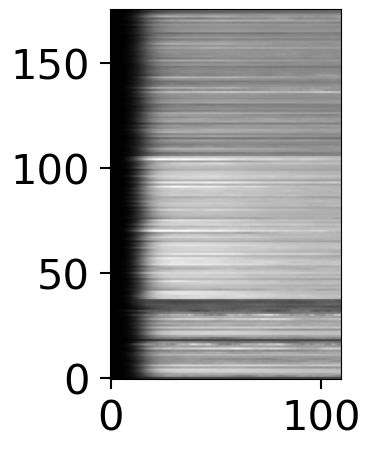

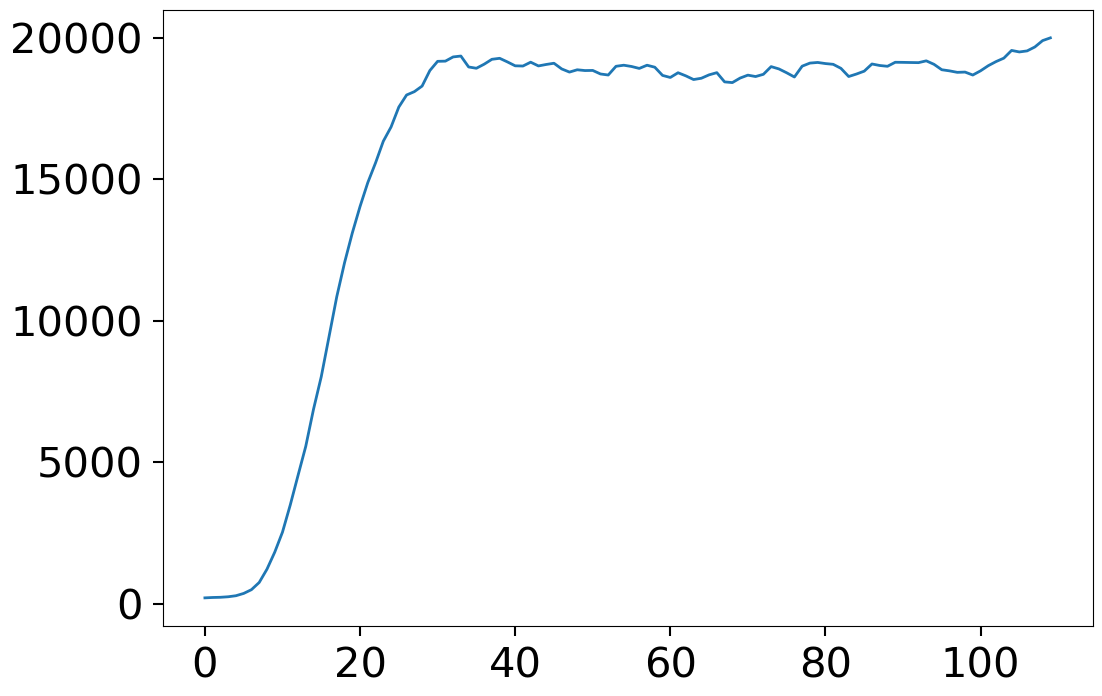

In [11]:
import nibabel as nib
import matplotlib.pyplot as plt

fqfn = os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-BrainMoCo2-createNiftiMovingAvgFrames-ParcWmparc-reshape-to-wmparc-wmparc.nii.gz")
nii = nib.load(fqfn)
img = nii.get_fdata()
plt.imshow(img, cmap="gray", origin="lower")

plt.figure(figsize=(12, 8))
plt.plot(img[0,], linewidth=2)